In [1]:
# Library Inclusion
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Variables declaration
bestAccuracy = 0
bestKernel = None
bestC = 0
bestGamma = 0
iteration = 100
kernelList = ['rbf', 'sigmoid', 'poly', 'linear', 'precomputed']

In [3]:
# Loading dataset (Wine Quality)
data = load_wine()
X = data.data
y = data.target

# Data Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Dividing the dataset into 70/30 for training and testing
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# fitnessFunction declaration
def fitnessFunction(k, c, g):
    # Train the model
    model = SVC(C=c, gamma=g)
    model.fit(X_train_all, y_train_all)

    # Prediction
    predicted = model.predict(X_test_all)

    # Model Evaluation: Accuracy
    accuracy = np.mean(y_test_all == predicted) * 100

    return accuracy

In [6]:
# Program Execution
for i in range(iteration):
    k = np.random.choice(kernelList, 1)[0]
    c = np.random.uniform(0.01, 10.0)  # Generating C within the feasible range
    g = np.random.random()
    accuracy = fitnessFunction(k, c, g)

    if accuracy > bestAccuracy:
        bestKernel = k
        bestC = c
        bestGamma = g
        bestAccuracy = accuracy

    print(f"Iteration {i + 1}: Best Accuracy: {bestAccuracy}, Best Kernel: {bestKernel}, Best C: {bestC}, Best Gamma: {bestGamma}")

Iteration 1: Best Accuracy: 74.07407407407408, Best Kernel: rbf, Best C: 7.411503247445562, Best Gamma: 0.7458720826385792
Iteration 2: Best Accuracy: 74.07407407407408, Best Kernel: rbf, Best C: 7.411503247445562, Best Gamma: 0.7458720826385792
Iteration 3: Best Accuracy: 74.07407407407408, Best Kernel: rbf, Best C: 7.411503247445562, Best Gamma: 0.7458720826385792
Iteration 4: Best Accuracy: 74.07407407407408, Best Kernel: rbf, Best C: 7.411503247445562, Best Gamma: 0.7458720826385792
Iteration 5: Best Accuracy: 98.14814814814815, Best Kernel: poly, Best C: 8.191267120097184, Best Gamma: 0.06676231479446337
Iteration 6: Best Accuracy: 98.14814814814815, Best Kernel: poly, Best C: 8.191267120097184, Best Gamma: 0.06676231479446337
Iteration 7: Best Accuracy: 98.14814814814815, Best Kernel: poly, Best C: 8.191267120097184, Best Gamma: 0.06676231479446337
Iteration 8: Best Accuracy: 98.14814814814815, Best Kernel: poly, Best C: 8.191267120097184, Best Gamma: 0.06676231479446337
Iteratio

In [7]:
# 5. Return Best: bestKernel, bestC, bestGamma, bestAccuracy
print(f"Best Kernel: {bestKernel}, Best C: {bestC}, Best Gamma: {bestGamma}, Best Accuracy: {bestAccuracy}")

Best Kernel: poly, Best C: 8.191267120097184, Best Gamma: 0.06676231479446337, Best Accuracy: 98.14814814814815


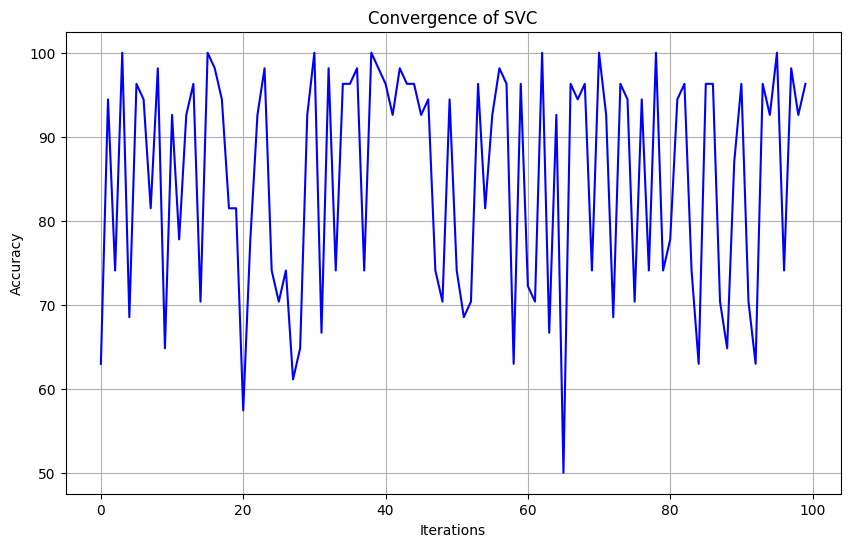

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot the convergence graph accuracy vs iterations
convergence = np.zeros(iteration)
for i in range(iteration):
    k = np.random.choice(kernelList, 1)[0]
    c = np.random.uniform(0.01, 10.0)  # Generating C within the feasible range
    g = np.random.random()
    accuracy = fitnessFunction(k, c, g)
    convergence[i] = accuracy

plt.figure(figsize=(10, 6))
plt.plot(np.arange(iteration), convergence, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Convergence of SVC")
plt.grid(True)
plt.show()
plt.savefig('graph.png')